In [1]:
from read_db.PG import GetPG
import pandas as pd
import pandas.io.sql as psql
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
import datetime 
import sqlalchemy
%matplotlib inline

<h5>Проанализируем установку приложения</h5>

In [2]:
#запрос для получения данных об установках приложения пользователями
install_df = GetPG('''Select distinct install_id, 
                    install_date, 
                    app_version_install,
                    media_source,
                    country_code_event 
                from game_analytics
                ''').df

C:\Python39\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Из следующих двух таблиц, отражающих количество установок каждой из версии, можно увидеть, что версия 1.0.0 устанавливалась в течение первых 13 дней (для объяснения отдельных установки 31 октября и 22 декабря не хватает знаний о продукте). Первая установка версии 1.1.0 состоялась 20 октбяря, но из данных второй таблицы я бы предположил что 20 и 21 октября были установки команды разработки и тестирования из Беларуси, Украины и Польши, так что полноценно обновление было запущено 23 октября.

In [3]:
with pd.option_context("display.max_rows", 84):
    display(pd.pivot_table(install_df.groupby(['install_date', 'app_version_install'], as_index=False).agg({'install_id':'count'}), values='install_id', index='install_date',
                    columns=['app_version_install'], aggfunc=np.sum))

app_version_install,1.0.0,1.1.0
install_date,,
2021-10-11,14.0,NaN
2021-10-12,3.0,NaN
2021-10-13,27.0,NaN
2021-10-14,6.0,NaN
2021-10-15,14.0,NaN
2021-10-16,65.0,NaN
2021-10-17,176.0,NaN
2021-10-18,129.0,NaN
2021-10-19,74.0,NaN


In [4]:
install_df.loc[(install_df['install_date']>=datetime.date(2021,10,20)) \
    & (install_df['install_date']<=datetime.date(2021,10,22)) \
    & (install_df['app_version_install']=='1.1.0')] \
        .groupby(['install_date','country_code_event', 'media_source'], as_index=False) \
            .agg({'install_id':'count'})

,install_date,country_code_event,media_source,install_id
0,2021-10-20,UA,n. a.,1
1,2021-10-21,BY,organic,1
2,2021-10-21,FR,n. a.,1
3,2021-10-21,PL,appsflyer_sdk_test_int,1
4,2021-10-21,PL,organic,9
5,2021-10-21,UA,n. a.,1
6,2021-10-22,IQ,organic,1
7,2021-10-22,PL,n. a.,1
8,2021-10-22,PL,organic,4
9,2021-10-22,US,organic,4


На графиках ниже можно увидеть, что для версии 1.1.0 приложения активная закупка трафика велась помимо unityads еще и у bytedanceglobal (азиатский рынок). Следовательно, анализировать улучшения приложения имеет смысл только в рамках organic и unityads, а качество bytedanceglobal проанализировать отдельно. 

Text(0.5, 1.0, 'по источникам трафика')

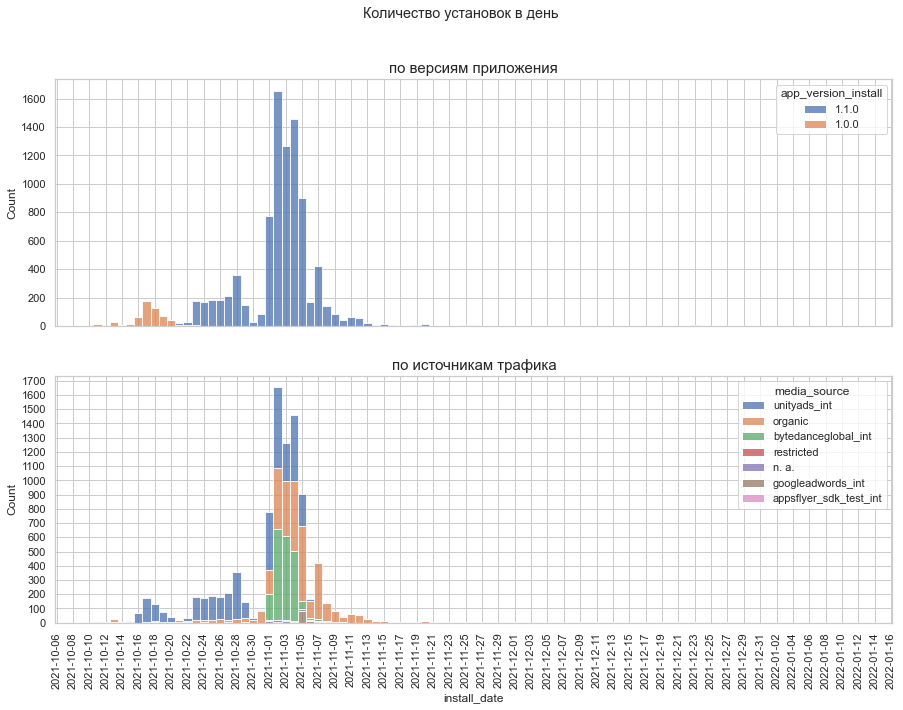

In [5]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(2,1,figsize=(15, 10), sharex=True)
f.suptitle('Количество установок в день')
sns.histplot(ax=ax[0], data = install_df, x="install_date", hue="app_version_install", multiple="stack")
sns.histplot(ax=ax[1], data = install_df, x="install_date", hue="media_source", multiple="stack")
plt.xticks(rotation = 90)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(2))
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(100))
ax[0].set_title('по версиям приложения', fontdict={'fontsize':15})
ax[1].set_title('по источникам трафика', fontdict={'fontsize':15})

Детализация трафиков по странам дает нам знать, что основной рынок приложения это <b>US</b>. Следующие 5 стран из топа представляют азиатский регион, закупленный через <b>bydanceglobal</b> и сопутствующую органику. Здесь стоит отметить, что доля орагнического трафика от общего объема трафика у азиатского региона была выше, чем этот же показатель у US - 34% vs 26%.
Как уже говорилось сравнивать версии приложения мы будем по <b>organic</b> и <b>unityads</b>, и теперь еще уточним, что только среди <b>US</b> пользователей.

In [6]:
#Total по количеству установок по каждому трафику и топ 20 стран
pd.pivot_table(install_df, values='install_id', index=['country_code_event'],
                    columns=['media_source'], aggfunc=lambda x: len(x.unique()), fill_value=0, margins=True, margins_name = 'Total') \
                    .sort_values("Total", ascending = False).head(20)

media_source,appsflyer_sdk_test_int,bytedanceglobal_int,googleadwords_int,n. a.,organic,restricted,unityads_int,Total
country_code_event,,,,,,,,
Total,2,1995,101,130,3411,32,3699,9370
US,0,164,0,48,1407,1,3677,5297
VN,0,798,25,7,431,11,0,1272
PH,0,434,1,20,234,8,0,697
TH,0,319,2,11,213,7,0,552
ID,0,127,0,6,84,3,0,220
MY,0,148,0,1,67,2,0,218
SA,0,0,16,4,138,0,0,158
EG,0,0,16,2,108,0,0,126


<h5>Проанализируем DAU</h5>

In [7]:
DAU_df = GetPG('''Select distinct install_id, 
                    date(event_dttm) as dates, 
                    app_version_install,
                    media_source,
                    country_code_event 
                from game_analytics''').df

C:\Python39\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Text(0.5, 1.0, 'US unityads пользователи')

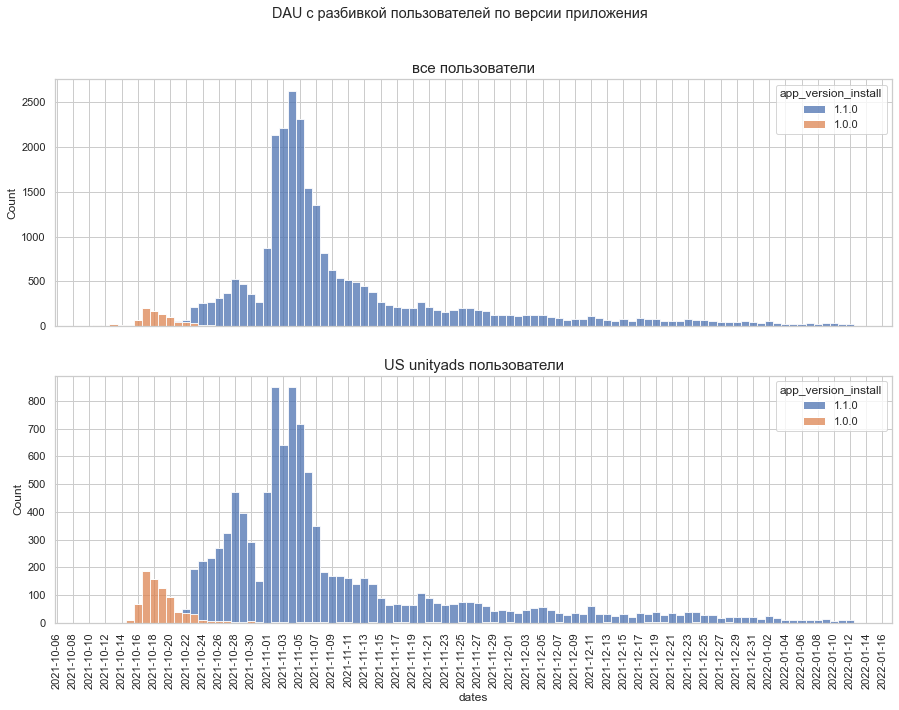

In [8]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(2,1,figsize=(15, 10), sharex=True)
f.suptitle('DAU c разбивкой пользователей по версии приложения')
sns.histplot(ax=ax[0], data = DAU_df, x="dates", hue="app_version_install", multiple="stack")
sns.histplot(ax=ax[1], 
            data = DAU_df.loc[(DAU_df['media_source']=='unityads_int') & (DAU_df['country_code_event']=='US')], 
            x="dates", hue="app_version_install", multiple="stack")
plt.xticks(rotation = 90)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(2))
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(100))
ax[0].set_title('все пользователи', fontdict={'fontsize':15})
ax[1].set_title('US unityads пользователи', fontdict={'fontsize':15})

<h5>Конверсия в уровни</h5>

Как видим, версии приложения отличаются количеством уровней. В версии 1.0.0 можно было максимум дойти до 30. При этом максимальных уровней достигал, похоже, только тестировщик (проверял отдельно не в рамках данного отчета).
Если же сравнивать версии приложений в рамках предложенной выше выборки (US игроки - organic и unityads_int), то видно, что проходят примерно только половину уровней, при этом дальше всех все же заходят отдельные игроки из рекламного трафика, видимо так как среди целевая аудитории больше шанс найти сильноувлеченного игрока.

In [9]:
GetPG("""Select app_version_install,  max(level_number::decimal) as max_level 
from game_analytics
group by app_version_install
""").df

C:\Python39\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,app_version_install,max_level
0,1.0.0,30.0
1,1.1.0,128.0


In [10]:
GetPG("""Select app_version_install, media_source, max(level_number::decimal) as max_level 
from game_analytics
where media_source in ('organic', 'unityads_int')
		and country_code_event = 'US'
group by app_version_install, media_source""").df

C:\Python39\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,app_version_install,media_source,max_level
0,1.0.0,organic,9.0
1,1.0.0,unityads_int,16.0
2,1.1.0,organic,40.0
3,1.1.0,unityads_int,57.0


In [11]:
level_conversion_df = GetPG("""With level_complete as (
	Select  install_date, app_version_install, media_source, 
	TO_NUMBER(level_number,'999.9') as level_number, count(distinct(install_id)) as level_compl_freq
	from game_analytics
	where level_number in ('1.0','5.0','13.0','20.0','30.0','35.0') 
		and event_name = 'game_complete_level' 
		and media_source in ('organic', 'unityads_int')
		and country_code_event = 'US'
		and install_date<='2021-11-05'
	group by install_date,app_version_install, media_source, level_number),
	installs as (Select install_date, app_version_install, media_source, count(distinct(install_id)) as installs
	from game_analytics
	where  media_source in ('organic', 'unityads_int') and country_code_event = 'US' and install_date<='2021-11-05'
	group by install_date, app_version_install, media_source)
Select level_complete.*, installs, COALESCE(ROUND((level_compl_freq::decimal/installs::decimal),4),0) as conversion
from level_complete 
left join installs
	on level_complete.install_date=installs.install_date
	and level_complete.app_version_install=installs.app_version_install
	and level_complete.media_source=installs.media_source
order by install_date, app_version_install, media_source, level_number""").df

C:\Python39\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Text(0.5, 1.0, 'в 35-ый уровень')

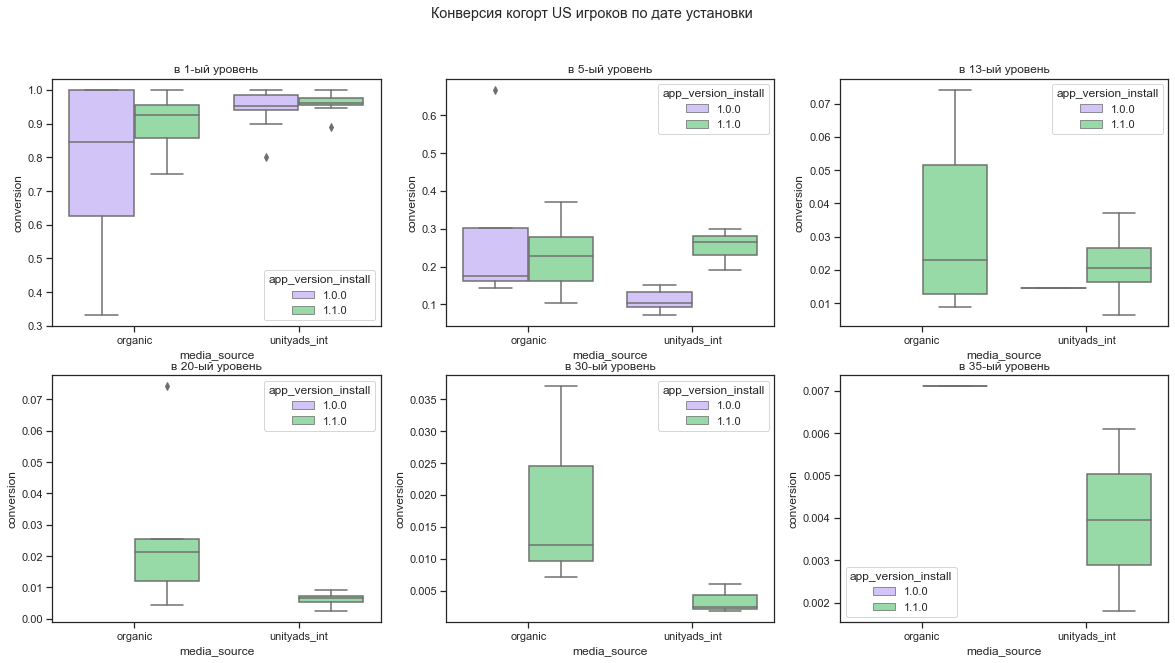

In [12]:
sns.set_theme(style="ticks", palette="pastel")
f, ax = plt.subplots(2,3,figsize=(20, 10))
f.suptitle('Конверсия когорт US игроков по дате установки')
sns.boxplot(ax=ax[0,0], x="media_source", y="conversion",
            hue="app_version_install", palette=["m", "g"], hue_order=['1.0.0','1.1.0'], order =['organic', 'unityads_int'],
            data=level_conversion_df.loc[level_conversion_df['level_number']==1])
ax[0,0].set_title('в 1-ый уровень')
sns.boxplot(ax=ax[0,1], x="media_source", y="conversion",
            hue="app_version_install", palette=["m", "g"], hue_order=['1.0.0','1.1.0'], order =['organic', 'unityads_int'],
            data=level_conversion_df.loc[level_conversion_df['level_number']==5])
ax[0,1].set_title('в 5-ый уровень')
sns.boxplot(ax=ax[0,2], x="media_source", y="conversion",
            hue="app_version_install", palette=["m", "g"], hue_order=['1.0.0','1.1.0'], order =['organic', 'unityads_int'],
            data=level_conversion_df.loc[level_conversion_df['level_number']==13])
ax[0,2].set_title('в 13-ый уровень')
sns.boxplot(ax=ax[1,0], x="media_source", y="conversion",
            hue="app_version_install", palette=["m", "g"], hue_order=['1.0.0','1.1.0'], order =['organic', 'unityads_int'],
            data=level_conversion_df.loc[level_conversion_df['level_number']==20])
ax[1,0].set_title('в 20-ый уровень')
sns.boxplot(ax=ax[1,1], x="media_source", y="conversion",
            hue="app_version_install", palette=["m", "g"], hue_order=['1.0.0','1.1.0'], order =['organic', 'unityads_int'],
            data=level_conversion_df.loc[level_conversion_df['level_number']==30])
ax[1,1].set_title('в 30-ый уровень')
sns.boxplot(ax=ax[1,2], x="media_source", y="conversion",
            hue="app_version_install", palette=["m", "g"], hue_order=['1.0.0','1.1.0'], order =['organic', 'unityads_int'],
            data=level_conversion_df.loc[level_conversion_df['level_number']==35])
ax[1,2].set_title('в 35-ый уровень')

Из боксплотов выше видно, что у новой версии в среднем конверсия в прохождение уровней выше, чем у старой версии. А органические пользователи, хоть и уступают рекламным в конверсии первого уровня, но в дальнейшем заходят в среднем в игре дальше (исключением являются отдельные рекламные игроки, которые проходят те уровни, до которых ни один орагнический игрок не дошел вовсе).

------------------------------------------------------------------------------------------------------------------------------
Коневерсия в уровни <b>bytedanceglobal</b>
Из таблиц и графиков ниже можно сделать вывод, что конверсия в уровни у азиатского рынка в среднем выше, чем у США. И конверсия рекламных пользователей остается выше чем у органическом на большем количестве уровней, что может говорить в пользу таргетированности источника трафика.

In [13]:
# исключаем из запроса одного пользователя из VN organic, 
# который своим поведением сильно отличается от остальных и возможно является тестировщиком под VPN
pd.pivot_table(GetPG("""Select country_code_event , media_source, max(level_number::decimal) as max_level 
from game_analytics
where media_source in ('organic', 'bytedanceglobal_int')
		and country_code_event in ('VN','PH','TH','ID','MY')
        and install_id !=1028575631  
group by country_code_event, media_source""").df,values='max_level', index=['country_code_event'], columns=['media_source'], aggfunc=np.sum)

C:\Python39\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


media_source,bytedanceglobal_int,organic
country_code_event,,
ID,47.0,34.0
MY,62.0,34.0
PH,64.0,33.0
TH,59.0,35.0
VN,49.0,40.0


In [14]:
level_conversion_bytedance_df= GetPG("""With level_complete as (
	Select  install_date, media_source, 
	TO_NUMBER(level_number,'999.9') as level_number, count(distinct(install_id)) as level_compl_freq
	from game_analytics
	where level_number in ('1.0','5.0','13.0','20.0','25.0','30.0') 
		and event_name = 'game_complete_level' 
		and media_source in ('organic', 'bytedanceglobal_int')
		and country_code_event in ('VN','PH','TH','ID','MY')
		and install_id !=1028575631 
		and install_date<='2021-11-05'
	group by install_date, media_source, level_number),
	installs as (Select install_date, app_version_install, media_source, count(distinct(install_id)) as installs
	from game_analytics
	where  media_source in ('organic', 'bytedanceglobal_int') 
			 and country_code_event in ('VN','PH','TH','ID','MY')
			 and install_date<='2021-11-05'
			 and install_id !=1028575631
	group by install_date, app_version_install, media_source)
Select level_complete.*, installs, COALESCE(ROUND((level_compl_freq::decimal/installs::decimal),4),0) as conversion
from level_complete 
left join installs
	on level_complete.install_date=installs.install_date
	and level_complete.media_source=installs.media_source
order by install_date, media_source, level_number""").df

C:\Python39\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Text(0.5, 1.0, 'в 30-ый уровень')

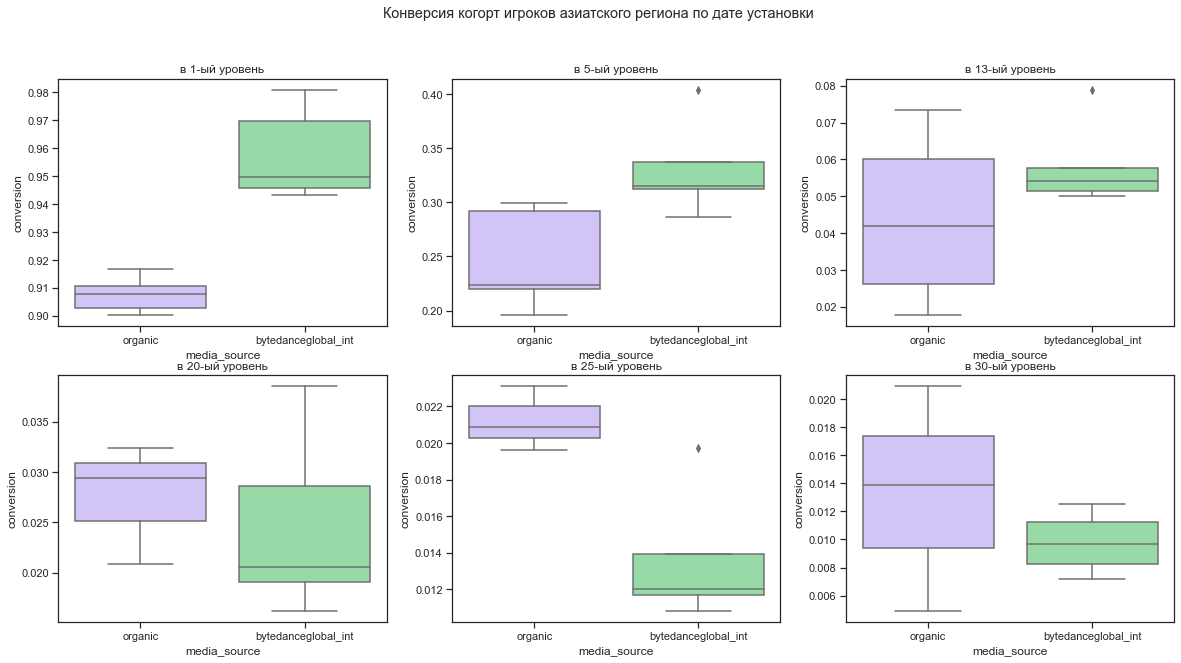

In [15]:
sns.set_theme(style="ticks", palette="pastel")
f, ax = plt.subplots(2,3,figsize=(20, 10))
f.suptitle('Конверсия когорт игроков азиатского региона по дате установки')
sns.boxplot(ax=ax[0,0], x="media_source", y="conversion",
            palette=["m", "g"], order =['organic', 'bytedanceglobal_int'],
            data=level_conversion_bytedance_df.loc[level_conversion_bytedance_df['level_number']==1])
ax[0,0].set_title('в 1-ый уровень')
sns.boxplot(ax=ax[0,1], x="media_source", y="conversion",
            palette=["m", "g"], order =['organic', 'bytedanceglobal_int'],
            data=level_conversion_bytedance_df.loc[level_conversion_bytedance_df['level_number']==5])
ax[0,1].set_title('в 5-ый уровень')
sns.boxplot(ax=ax[0,2], x="media_source", y="conversion",
            palette=["m", "g"], order =['organic', 'bytedanceglobal_int'],
            data=level_conversion_bytedance_df.loc[level_conversion_bytedance_df['level_number']==13])
ax[0,2].set_title('в 13-ый уровень')
sns.boxplot(ax=ax[1,0], x="media_source", y="conversion",
            palette=["m", "g"], order =['organic', 'bytedanceglobal_int'],
            data=level_conversion_bytedance_df.loc[level_conversion_bytedance_df['level_number']==20])
ax[1,0].set_title('в 20-ый уровень')
sns.boxplot(ax=ax[1,1], x="media_source", y="conversion",
            palette=["m", "g"], order =['organic', 'bytedanceglobal_int'],
            data=level_conversion_bytedance_df.loc[level_conversion_bytedance_df['level_number']==25])
ax[1,1].set_title('в 25-ый уровень')
sns.boxplot(ax=ax[1,2], x="media_source", y="conversion",
            palette=["m", "g"], order =['organic', 'bytedanceglobal_int'],
            data=level_conversion_bytedance_df.loc[level_conversion_bytedance_df['level_number']==30])
ax[1,2].set_title('в 30-ый уровень')

<h5>Конверсия в покупку в магазине</h5>

Как следует из графиков ниже, концепция магазина отсутствовала в версии приожения 1.0.0. Его создание стало попыткой улучшить приложения.
Тем не менее конверсия даже просто во вход в магазин крайне невысока, особенно на азиатском рынке. Имеет смысл поработать над тем, чтобы привести игроков в магазин.


In [16]:
shop_conversion_df= GetPG("""With level_complete as (
	Select  install_date, app_version_install, event_name, media_source, count(distinct(install_id)) as get_item_shop_freq
	from game_analytics
	where (event_name ='game_open_shop' or (event_name='game_get_item' and placement='shop'))
		and media_source in ('organic', 'unityads_int')
		and country_code_event = 'US'
		and install_date<='2021-11-05'
	group by install_date,app_version_install, event_name, media_source, level_number),
	installs as (Select install_date, app_version_install, media_source, count(distinct(install_id)) as installs
	from game_analytics
	where  media_source in ('organic', 'unityads_int') and country_code_event = 'US' and install_date<='2021-11-05'
	group by install_date, app_version_install, media_source)
Select level_complete.*, installs, COALESCE(ROUND((get_item_shop_freq::decimal/installs::decimal),4),0) as conversion
from level_complete 
left join installs
	on level_complete.install_date=installs.install_date
	and level_complete.app_version_install=installs.app_version_install
	and level_complete.media_source=installs.media_source
order by install_date, app_version_install, media_source, event_name""").df

C:\Python39\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


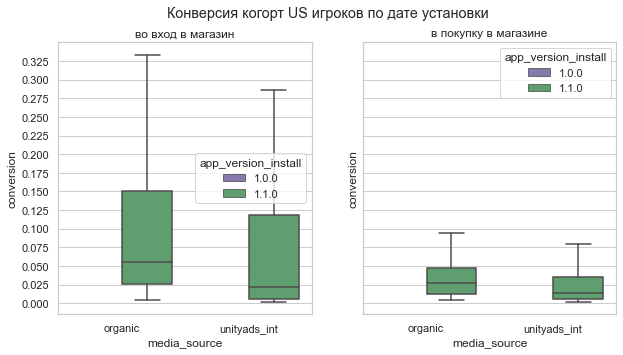

In [17]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(1,2,figsize=(10, 5), sharey=True)
f.suptitle('Конверсия когорт US игроков по дате установки')
sns.boxplot(ax=ax[0], x="media_source", y="conversion", showfliers=False,
            hue="app_version_install", palette=["m", "g"], hue_order=['1.0.0','1.1.0'], order =['organic', 'unityads_int'],
            data=shop_conversion_df.loc[shop_conversion_df['event_name']=='game_open_shop'])
ax[0].set_title('во вход в магазин')
sns.boxplot(ax=ax[1], x="media_source", y="conversion", showfliers=False,
            hue="app_version_install", palette=["m", "g"], hue_order=['1.0.0','1.1.0'], order =['organic', 'unityads_int'],
            data=shop_conversion_df.loc[shop_conversion_df['event_name']=='game_get_item'])
ax[1].set_title('в покупку в магазине')
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(0.025))

In [18]:
shop_conversion_bytedance_df= GetPG("""With level_complete as (
	Select  install_date, app_version_install, event_name, media_source, count(distinct(install_id)) as get_item_shop_freq
	from game_analytics
	where (event_name ='game_open_shop' or (event_name='game_get_item' and placement='shop'))
		and media_source in ('organic', 'bytedanceglobal_int') 
		and country_code_event in ('VN','PH','TH','ID','MY')
		and install_date<='2021-11-05'
	group by install_date,app_version_install, event_name, media_source, level_number),
	installs as (Select install_date, app_version_install, media_source, count(distinct(install_id)) as installs
	from game_analytics
	where  media_source in ('organic', 'bytedanceglobal_int') and country_code_event in ('VN','PH','TH','ID','MY') and install_date<='2021-11-05'
	group by install_date, app_version_install, media_source)
Select level_complete.*, installs, COALESCE(ROUND((get_item_shop_freq::decimal/installs::decimal),4),0) as conversion
from level_complete 
left join installs
	on level_complete.install_date=installs.install_date
	and level_complete.app_version_install=installs.app_version_install
	and level_complete.media_source=installs.media_source
order by install_date, app_version_install, media_source, event_name""").df

C:\Python39\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


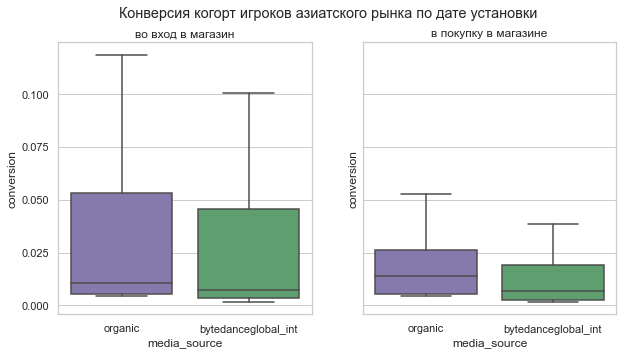

In [19]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(1,2,figsize=(10, 5), sharey=True)
f.suptitle('Конверсия когорт игроков азиатского рынка по дате установки')
sns.boxplot(ax=ax[0], x="media_source", y="conversion"
            , palette=["m", "g"], order =['organic', 'bytedanceglobal_int'], showfliers=False,
            data=shop_conversion_bytedance_df.loc[shop_conversion_bytedance_df['event_name']=='game_open_shop'])
ax[0].set_title('во вход в магазин')
sns.boxplot(ax=ax[1], x="media_source", y="conversion",
            palette=["m", "g"], order =['organic', 'bytedanceglobal_int'], showfliers=False,
            data=shop_conversion_bytedance_df.loc[shop_conversion_bytedance_df['event_name']=='game_get_item'])
ax[1].set_title('в покупку в магазине')
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(0.025))

<h5>Retention</h5>

В этой секции мы можем увидеть, что после сделанных в приложении улучшений удержание игроков стало больше. Это заметно как по рекламным, так и по органическим игрокам.
Сравнение же двух источников трафика (bytedanceglobal и unityads) в версии приложения 1.1.0 показало, что удержание пользователей приблизительно одинаково (у bytedanceglobal чуть выше в первые три дня). 

In [20]:
retention_df = GetPG("""With AU as (Select days_from_install, app_version_install, media_source, count(distinct(install_id)) as AU
from game_analytics
where media_source in ('organic', 'unityads_int')
	and country_code_event = 'US'
	and install_date<='2021-11-05'
	and days_from_install <= 30
group by days_from_install, app_version_install, media_source)
Select days_from_install, app_version_install, media_source, 
round(AU/FIRST_VALUE(AU) over (partition by app_version_install, media_source order by media_source, days_from_install)::decimal,3) as retention
from AU
order by app_version_install, media_source, days_from_install""").df

C:\Python39\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [21]:
retention_df2 = GetPG("""With AU as (Select days_from_install, media_source, count(distinct(install_id)) as AU
from game_analytics
where media_source in ('bytedanceglobal_int', 'unityads_int')
	and install_date<='2021-11-05'
	and days_from_install <= 30
	and app_version_install = '1.1.0'
group by days_from_install, app_version_install, media_source)
Select days_from_install, media_source, 
round(AU/FIRST_VALUE(AU) over (partition by media_source order by media_source, days_from_install)::decimal,3) as retention
from AU
order by media_source, days_from_install""").df

C:\Python39\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


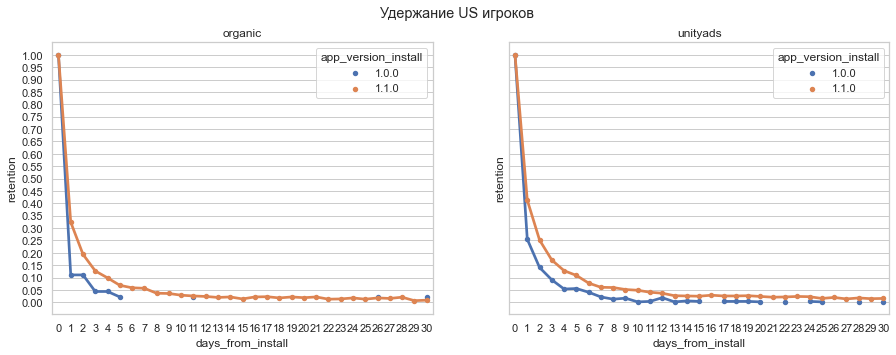

In [22]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(1,2,figsize=(15, 5), sharey=True)
f.suptitle('Удержание US игроков')
sns.pointplot(ax=ax[0], x="days_from_install", y="retention", markers = '.', hue="app_version_install",
            data=retention_df.loc[retention_df['media_source']=='organic'])
ax[0].set_title('organic')
sns.pointplot(ax=ax[1], x="days_from_install", y="retention", markers = '.', hue="app_version_install",
            data=retention_df.loc[retention_df['media_source']=='unityads_int'])
ax[1].set_title('unityads')
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(0.05))

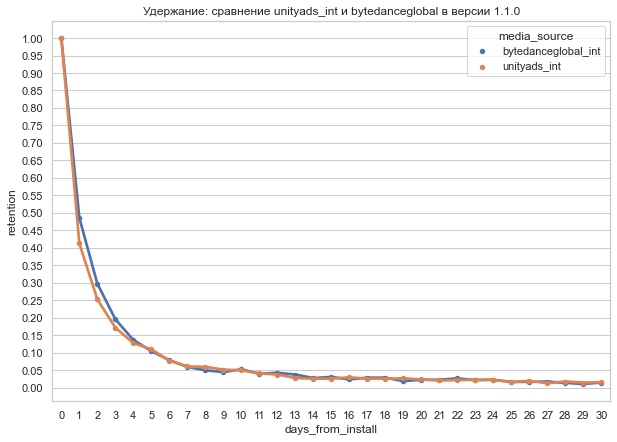

In [23]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 7))
sns.pointplot(x="days_from_install", y="retention", markers ='.', hue="media_source", data=retention_df2)
ax.set_title('Удержание: сравнение unityads_int и bytedanceglobal в версии 1.1.0')
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))

<h5>Продолжительность сессии и игрового дня</h5>
С измененими в приложении плэйтайм слегка вырос, но говорить о значительных изменениях нельзя. В большинстве своем игроки тратят в версии 1.1.0 около 3 минут за сессию и 4 минут в течение дня (это утверждение верно и для US, и для азиатского региона).
Таким образом большинство пользуется приложением 1.3-1.5 раза в сутки. Если получится заставить игроков возвращаться в игру чаще в течение дня, то можно будет ожидать значительного роста плэйтайма, т.к. сейчас он недостаточно высок.

In [24]:
Session_df = GetPG("""
    Select 
        install_id, session_order_id, app_version_install, media_source, 
        round(sum(milliseconds_to_next_event)/1000/60::decimal,1) as session_long
    from game_analytics
    where 
        is_session_last_event=false
        and media_source in ('organic', 'unityads_int')
        and country_code_event = 'US'
    group by 
        install_id, session_order_id, app_version_install, media_source
    having 
        sum(milliseconds_to_next_event)>0
""").df


C:\Python39\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [25]:
Session_df_bytedance = GetPG("""
    Select 
        install_id, session_order_id, app_version_install, media_source, 
        round(sum(milliseconds_to_next_event)/1000/60::decimal,1) as session_long
    from game_analytics
    where 
        is_session_last_event=false
        and media_source in ('organic', 'bytedanceglobal_int') 
		and country_code_event in ('VN','PH','TH','ID','MY')
    group by 
        install_id, session_order_id, app_version_install, media_source
    having 
        sum(milliseconds_to_next_event)>0
""").df

C:\Python39\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


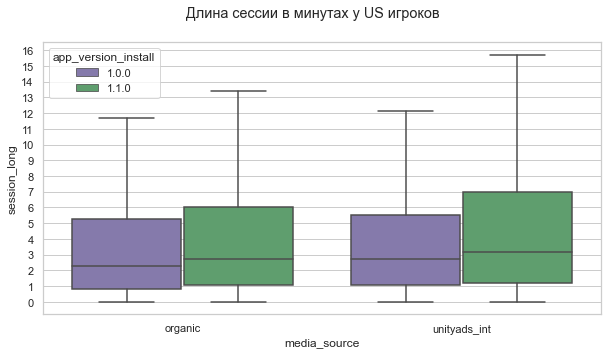

In [26]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 5))
f.suptitle('Длина сессии в минутах у US игроков')
sns.boxplot(x="media_source", y="session_long",
            hue="app_version_install", palette=["m", "g"], hue_order=['1.0.0','1.1.0'], order =['organic', 'unityads_int'],
            data=Session_df, showfliers=False)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

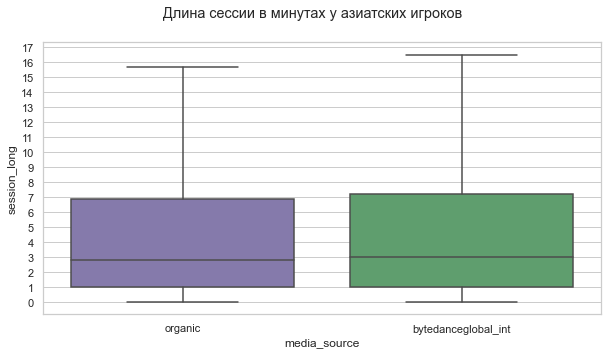

In [27]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 5))
f.suptitle('Длина сессии в минутах у азиатских игроков')
sns.boxplot(x="media_source", y="session_long",
            palette=["m", "g"], order =['organic', 'bytedanceglobal_int'],
            data=Session_df_bytedance, showfliers=False)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

In [28]:
playtime_df = GetPG("""
    Select 
        install_id, date(event_dttm) as date, app_version_install, media_source, 
        round(sum(milliseconds_to_next_event)/1000/60::decimal,1) as playtime
    from game_analytics
    where 
        is_session_last_event=false
	    and media_source in ('organic', 'unityads_int')
	    and country_code_event = 'US'
    group by 
        install_id, date, app_version_install, media_source
    having 
        sum(milliseconds_to_next_event)>0"""
).df

C:\Python39\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [29]:
playtime_bytedance_df = GetPG("""
    Select 
        install_id, date(event_dttm) as date, app_version_install, media_source, 
        round(sum(milliseconds_to_next_event)/1000/60::decimal,1) as playtime
    from game_analytics
    where 
        is_session_last_event=false
        and media_source in ('organic', 'bytedanceglobal_int') 
		and country_code_event in ('VN','PH','TH','ID','MY')
    group by 
        install_id, date, app_version_install, media_source
    having 
        sum(milliseconds_to_next_event)>0"""
).df

C:\Python39\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


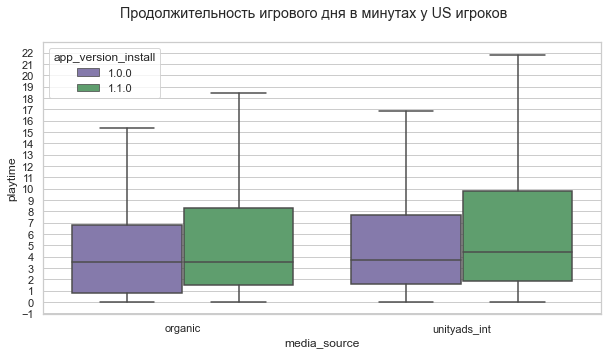

In [30]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 5))
f.suptitle('Продолжительность игрового дня в минутах у US игроков')
sns.boxplot(x="media_source", y="playtime",
            hue="app_version_install", palette=["m", "g"], hue_order=['1.0.0','1.1.0'], order =['organic', 'unityads_int'],
            data=playtime_df, showfliers=False)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

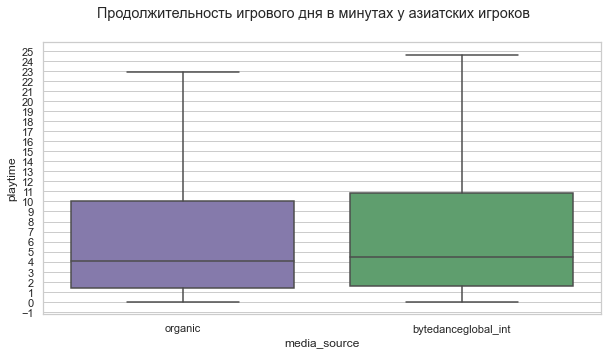

In [31]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 5))
f.suptitle('Продолжительность игрового дня в минутах у азиатских игроков')
sns.boxplot(x="media_source", y="playtime",
            palette=["m", "g"], order =['organic', 'bytedanceglobal_int'],
            data=playtime_bytedance_df, showfliers=False)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

<h5>Исследование прохождения уровней</h5>

Проанализировав как проходят уровни игроки, привлеченные рекламными трафиками, можно увидеть, что отвал игроков начинается буквально с первых же уровней (уже к 4-ому остается только половина всех игроков). Есть предположение, что причиной могут быть слишком сложные первые уровни, и следовало бы свести количество попыток на их прохождение для большинства игроков к одному разу. Отдельно выделяются 5, 8 и 11 уровни. Их имеет смысл изучить поглубже, чтобы понять, почему на них спотыкаются игроки.

In [32]:
Levels_df=GetPG("""Select install_id, level_number::decimal, 
			  round(sum(milliseconds_to_next_event)/1000/60::decimal,1) as playtime,
			  sum(attempts_count::decimal) as attempts
from game_analytics
where is_session_last_event=false
	and media_source in  ('unityads_int')
	and country_code_event = 'US'
	and app_version_install = '1.1.0'
	and level_number is not null
group by install_id, level_number
having sum(attempts_count::decimal) is not null""").df

C:\Python39\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [33]:
Levels_bytedance_df=GetPG("""Select install_id, level_number::decimal, 
			  round(sum(milliseconds_to_next_event)/1000/60::decimal,1) as playtime,
			  sum(attempts_count::decimal) as attempts
from game_analytics
where is_session_last_event=false
	and media_source in  ('bytedanceglobal_int')
	and country_code_event in ('VN','PH','TH','ID','MY')
	and app_version_install = '1.1.0'
	and level_number is not null
group by install_id, level_number
having sum(attempts_count::decimal) is not null""").df

C:\Python39\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [34]:
US_unityads_installs=install_df['install_id'].loc[(install_df['app_version_install']=='1.1.0') &(install_df['country_code_event']=='US')&(install_df['media_source']=='unityads_int')].nunique()
Levels_df_upd=Levels_df.groupby('level_number',as_index=False).agg({'playtime':'median','attempts':'median','install_id':'nunique'})
Levels_df_upd['installs']=US_unityads_installs
Levels_df_upd['conversion, %']=round((Levels_df_upd['install_id']/Levels_df_upd['installs']) * 100, 2)
Levels_df_upd=Levels_df_upd.drop(columns = ['install_id', 'installs'], axis = 1)
Levels_df_upd['level_number']=Levels_df_upd['level_number'].astype('int')
Levels_df_upd=Levels_df_upd.loc[Levels_df_upd['level_number']<=17]

In [35]:
bytedanceglobal_installs=install_df['install_id'].loc[(install_df['app_version_install']=='1.1.0') &(install_df['country_code_event'].isin(['VN','PH','TH','ID','MY']))&(install_df['media_source']=='bytedanceglobal_int')].nunique()
Levels_bytedance_df_upd=Levels_bytedance_df.groupby('level_number',as_index=False).agg({'playtime':'median','attempts':'median','install_id':'nunique'})
Levels_bytedance_df_upd['installs']=bytedanceglobal_installs
Levels_bytedance_df_upd['conversion, %']=round((Levels_bytedance_df_upd['install_id']/Levels_bytedance_df_upd['installs']) * 100, 2)
Levels_bytedance_df_upd=Levels_bytedance_df_upd.drop(columns = ['install_id', 'installs'], axis = 1)
Levels_bytedance_df_upd['level_number']=Levels_bytedance_df_upd['level_number'].astype('int')
Levels_bytedance_df_upd=Levels_bytedance_df_upd.loc[Levels_bytedance_df_upd['level_number']<=17]

Text(0.5, 1.0, 'Кол-во попыток на прохождение')

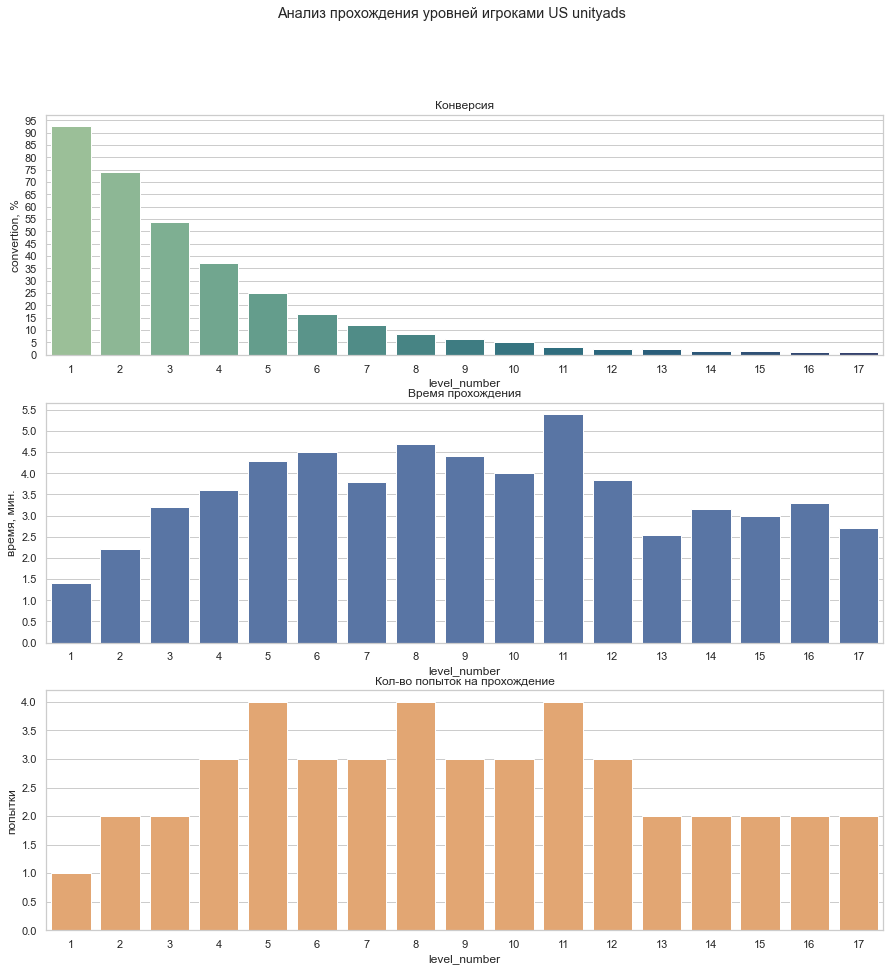

In [36]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(3,1,figsize=(15, 15))
f.suptitle('Анализ прохождения уровней игроками US unityads')
sns.barplot(ax=ax[0], x='level_number', y='conversion, %', palette="crest",data=Levels_df_upd)
ax[0].set_ylabel("convertion, %")
ax[0].set_title("Конверсия")
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(5))
sns.barplot(ax=ax[1], x='level_number', y='playtime',color='b',data=Levels_df_upd)
ax[1].set_ylabel("время, мин.")
ax[1].set_title("Время прохождения")
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(0.5))
sns.barplot(ax=ax[2], x='level_number', y='attempts', color='sandybrown',data=Levels_df_upd)
ax[2].set_ylabel("попытки")
ax[2].set_title("Кол-во попыток на прохождение")


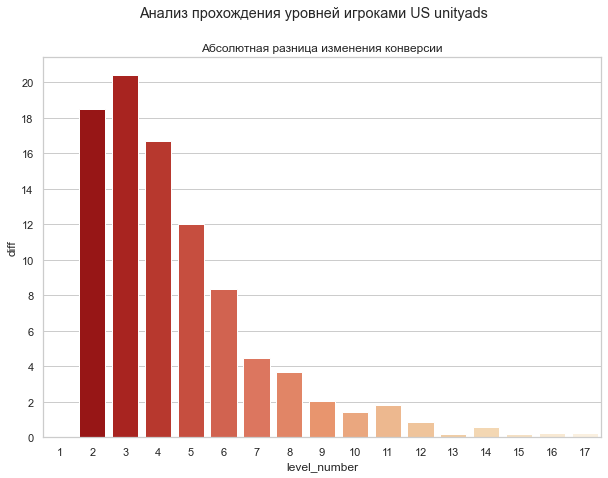

In [37]:
Levels_df_upd['conversion_diff']=Levels_df_upd['conversion, %'].diff()*(-1)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 7))
f.suptitle('Анализ прохождения уровней игроками US unityads')
sns.barplot(x='level_number', y='conversion_diff', palette="OrRd_r",data=Levels_df_upd)
ax.set_ylabel("diff")
ax.set_title("Абсолютная разница изменения конверсии")
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))


Text(0.5, 1.0, 'Кол-во попыток на прохождение')

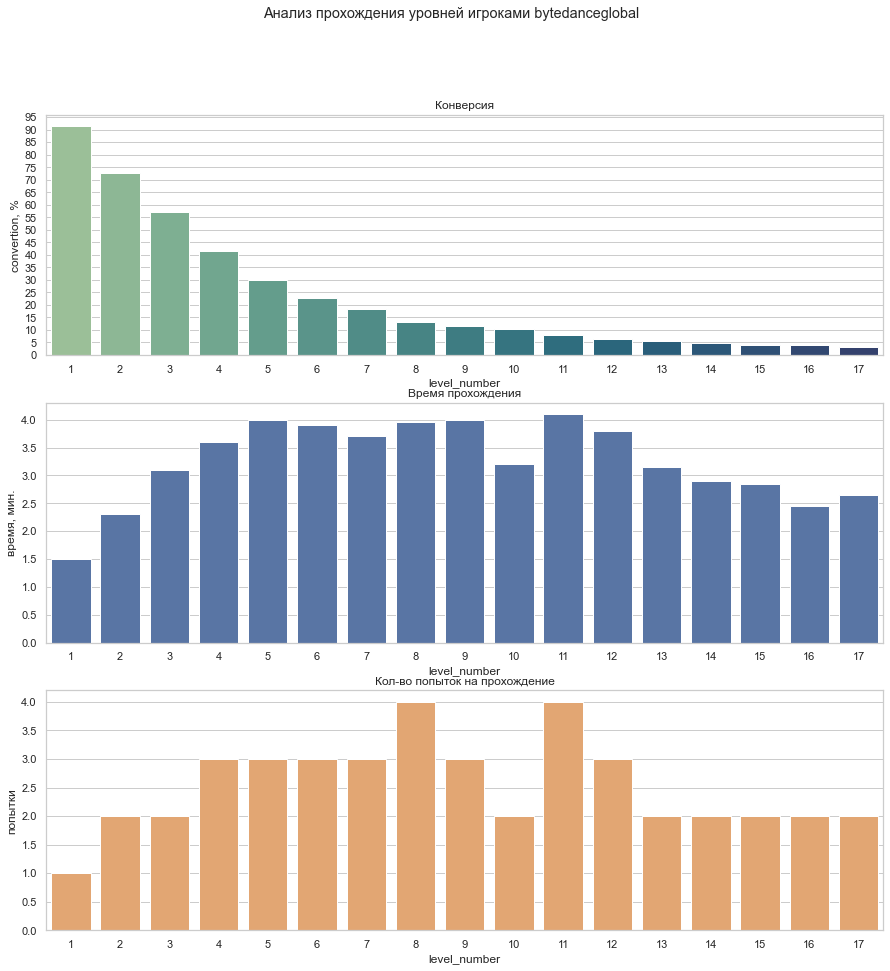

In [38]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(3,1,figsize=(15, 15))
f.suptitle('Анализ прохождения уровней игроками bytedanceglobal')
sns.barplot(ax=ax[0], x='level_number', y='conversion, %', palette="crest",data=Levels_bytedance_df_upd)
ax[0].set_ylabel("convertion, %")
ax[0].set_title("Конверсия")
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(5))
sns.barplot(ax=ax[1], x='level_number', y='playtime',color='b',data=Levels_bytedance_df_upd)
ax[1].set_ylabel("время, мин.")
ax[1].set_title("Время прохождения")
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(0.5))
sns.barplot(ax=ax[2], x='level_number', y='attempts', color='sandybrown',data=Levels_bytedance_df_upd)
ax[2].set_ylabel("попытки")
ax[2].set_title("Кол-во попыток на прохождение")


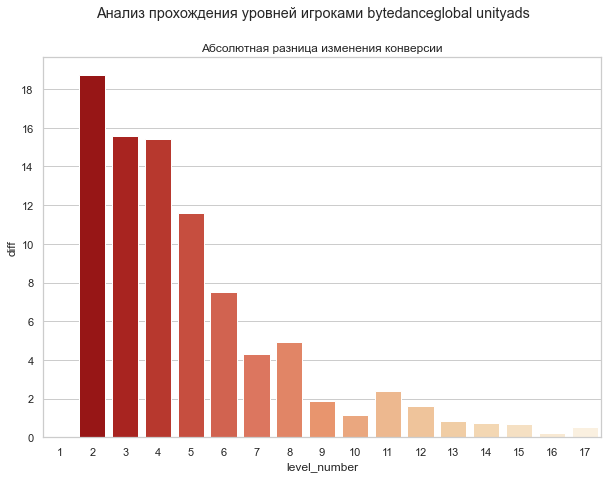

In [39]:
Levels_bytedance_df_upd['conversion_diff']=Levels_bytedance_df_upd['conversion, %'].diff()*(-1)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 7))
f.suptitle('Анализ прохождения уровней игроками bytedanceglobal unityads')
sns.barplot(x='level_number', y='conversion_diff', palette="OrRd_r",data=Levels_bytedance_df_upd)
ax.set_ylabel("diff")
ax.set_title("Абсолютная разница изменения конверсии")
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))